In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
from urllib import request
from gensim.models import Word2Vec

#Dataset

[Link to the dataset](https://www.cs.cornell.edu/~shuochen/lme/data_page.html)

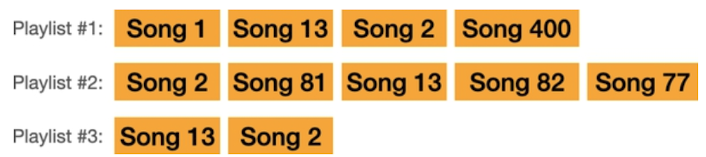

### Songs metadata

In [ ]:
# Load song metadata
# Mapping from integer ID to song's title and artist
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode("utf-8").split('\n')
songs = [s.strip().split('\t') for s in songs_file]
songs = [[song_field.strip() for song_field in song] for song in songs]
songs_df = pd.DataFrame(data=songs, columns = ['id', 'title', 'artist'])
songs_df = songs_df[songs_df['id'] != '']
songs_df = songs_df.set_index('id')


### Playlists

In [ ]:


# Get the playlist dataset file
# Training playlists, using integer ID to represent songs
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')

# Parse the playlist dataset file. Skip the first two lines as
# they only contain metadata
lines = data.read().decode("utf-8").split('\n')[2:]

# Remove playlists with only one song
playlists = [s.strip().split() for s in lines if len(s.split()) > 1]



In [ ]:
len(playlists)

In [ ]:
print( 'Playlist #1:\n ', playlists[0], '\n')

In [ ]:
songs_df.index

In [ ]:
print('Playlist #1:')
for song_id in playlists[0]:
    if song_id in songs_df.index:
        print(f"  - {songs_df.loc[song_id]['title']} by {songs_df.loc[song_id]['artist']}")
    else:
        print(f"  - Song with ID {song_id} not found in metadata")


# Word2Vec

In [ ]:
# Train our Word2Vec model
model = Word2Vec(
    playlists, vector_size=32, window=20, negative=50, min_count=1, workers=4
)

In [ ]:
print(songs_df.iloc[2172])

In [ ]:
song_id = 2172

# Ask the model for songs similar to song #2172
model.wv.most_similar(positive=str(song_id))

In [ ]:
import numpy as np

def print_recommendations(song_id):
    similar_songs = np.array(
        model.wv.most_similar(positive=str(song_id),topn=5)
    )[:,0]
    return  songs_df.iloc[similar_songs]


In [ ]:
print_recommendations(2172)

In [ ]:
print(songs_df.iloc[842])
print_recommendations(842)

In [ ]:
songs_df[songs_df['artist'].fillna('').str.contains('Adele')]

In [ ]:
print(songs_df.iloc[34884])
print_recommendations(34884)

In [ ]:
songs_df[songs_df['artist'].fillna('').str.contains('Beatles')]

In [ ]:
print(songs_df.iloc[1675])
print_recommendations(1675)